<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Tarefa_10_Pre%C3%A7o_Bolsa_Valores_Petrobas_Crise_Caminhoneiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Download base
[link text](https://br.financas.yahoo.com/quote/PETR4.SA/history?period1=1356998400&period2=1517356800&interval=1d&filter=history&frequency=1d)

Treino até Dezembro 2017

Teste Inicio de Janeiro ao Final de Janeiro

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
base = pd.read_csv('/content/sample_data/petr4_treinamento_ex.csv')
base = base.dropna()#dropa valores nulos
base_treinamento = base.iloc[:, 1:2].values #pega somento o valor ontem no caso preço de abertura

normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)# deixa a base de treinamento normalizada entre 0 e 1

In [0]:
previsores = []
preco_real = []
for i in range(90, len(base_treinamento_normalizada)):
  previsores.append(base_treinamento_normalizada[i - 90: i, 0])
  preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))#return_sequences passa a informacao para as proxima camada LSTM
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])#adam tambem server porem para redes recorrentes o rmsprop pode trazer melhores resultados
regressor.fit(previsores, preco_real, epochs = 30, batch_size = 32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





1252/1252 [==============================] - 15s 12ms/step - loss: 0.0290 - mean_absolute_error: 0.1265
Epoch 2/30
1252/1252 [==============================] - 13s 10ms/step - loss: 0.0136 - mean_absolute_error: 0.0884
Epoch 3/30
1252/1252 [==============================] - 13s 11ms/step - loss: 0.0116 - mean_absolute_error: 0.0821
Epoch 4/30
1252/1252 [==============================] - 13s 11ms/step - loss: 0.0086 - mean_absolute_error: 0.0714
Epoch 5/30
1252/1252 [==============================] - 13s 11ms/step - loss: 0.0099 - mean_absolute_error: 0.0760
Epoch 6/30
1252/1252 [==============================] - 13s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0650
Epoch 7/30
1252/1252 [==============================] - 13s 11ms/step - loss: 0.0075 - m

In [0]:
base_teste = pd.read_csv('/content/sample_data/petr4_teste_ex.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)#concatena 2 arquivos, axis =0 indica que isto e feito por coluna
entradas = base_completa[len(base_completa) - len(base_teste)- 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [0]:
X_teste = []
for i in range(90, len(entradas)):
  X_teste.append(entradas[i-90: i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsores = regressor.predict(X_teste)
previsores = normalizador.inverse_transform(previsores)# desnormaliza os dados
for i in range(len(previsores)):
  print(previsores[i], preco_real_teste[i])
print("Diferença Media: " , previsores.mean() - preco_real_teste.mean())

[19.422255] [19.200001]
[18.310741] [18.]
[17.432177] [18.389999]
[16.968357] [19.559999]
[17.10843] [17.290001]
[17.33893] [17.360001]
[17.322515] [16.469999]
[16.930206] [16.]
[16.294724] [15.81]
[15.663562] [15.5]
[15.201315] [15.48]
[14.97316] [15.42]
[14.934812] [15.33]
[14.977413] [15.03]
[14.971316] [14.77]
[14.848564] [14.26]
[14.587948] [15.84]
[14.480237] [16.09]
[14.666667] [15.41]
Diferença Media:  -0.25140476026032843


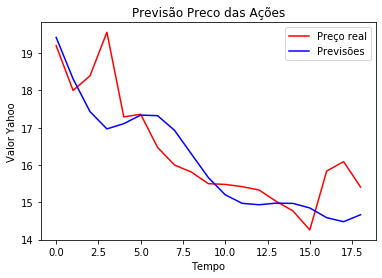

In [0]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsores, color = 'blue', label = 'Previsões')
plt.title('Previsão Preco das Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()